In [90]:
#ImportO le librerie necessarie
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns  

In [91]:
# Carico i dati da un file CSV
df = pd.read_csv('california_housing_data.csv')
print(df)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  MedHouseVal  
0      

In [92]:
print("----------------------------------------")
print(df.info())     # tipo di dato e valori mancanti
print("----------------------------------------")
print(df.describe()) # statistiche sulle colonne numeriche
print("----------------------------------------")

----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None
----------------------------------------
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   11

In [93]:
#Calcolo Q1 e Q3
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

#Mantengo solo i dati senza outlier
df_clean = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [94]:
X = df_clean.drop(["MedHouseVal", "Population", "AveOccup"], axis=1)
y = df_clean["MedHouseVal"]

print(">>> Shape X:", X.shape)
print(">>> Shape y:", y.shape)
print("\n>>> Prime 5 righe di X:")
print(X.head())
print("\n>>> Prime 5 valori di y:")
print(y.head())
print("----------------------------------------")



>>> Shape X: (16312, 6)
>>> Shape y: (16312,)

>>> Prime 5 righe di X:
   MedInc  HouseAge  AveRooms  AveBedrms  Latitude  Longitude
2  7.2574      52.0  8.288136   1.073446     37.85    -122.24
3  5.6431      52.0  5.817352   1.073059     37.85    -122.25
4  3.8462      52.0  6.281853   1.081081     37.85    -122.25
5  4.0368      52.0  4.761658   1.103627     37.85    -122.25
6  3.6591      52.0  4.931907   0.951362     37.84    -122.25

>>> Prime 5 valori di y:
2    3.521
3    3.413
4    3.422
5    2.697
6    2.992
Name: MedHouseVal, dtype: float64
----------------------------------------


In [95]:
#Standardizzazione
#selected_cols = ["MedInc","HouseAge","AveRooms", "AveBedrms", "Latitude", "Longitude"]
#X = df[selected_cols]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

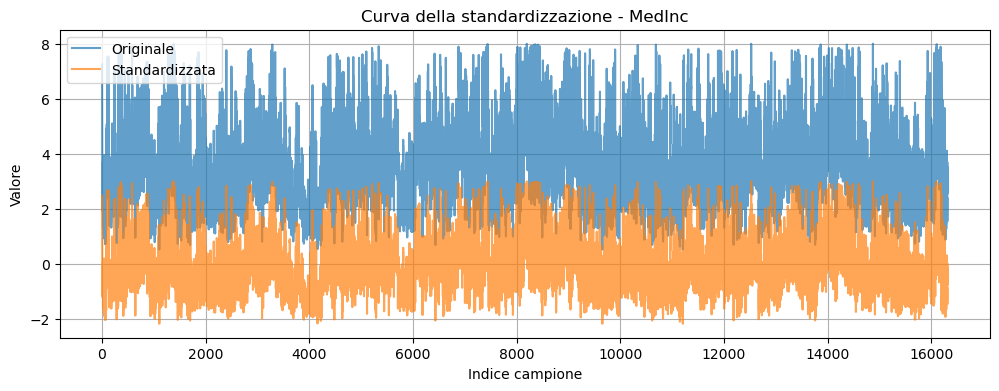

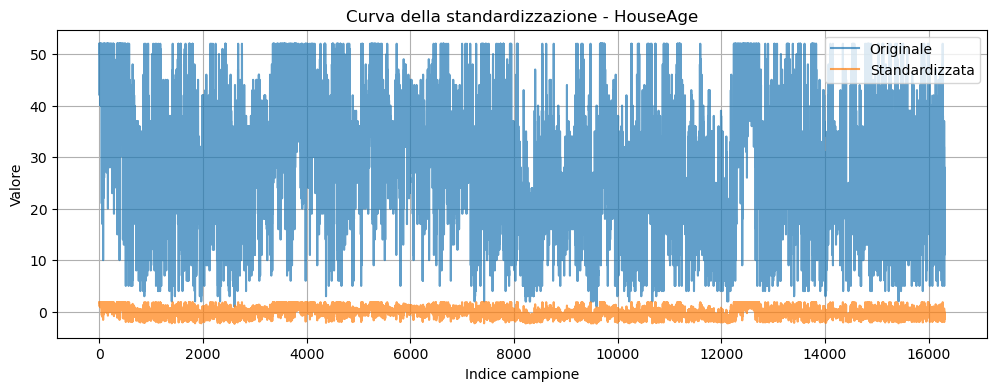

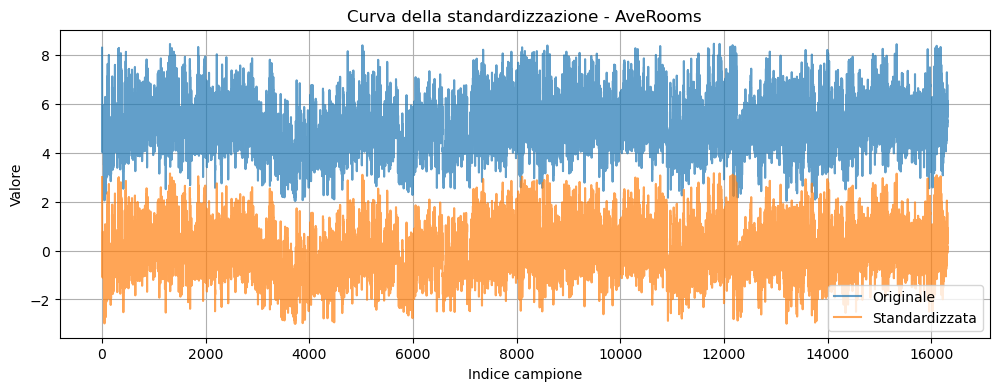

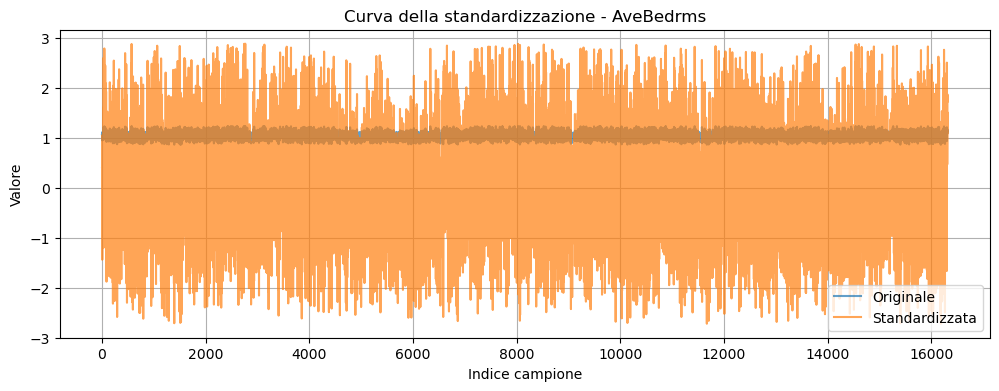

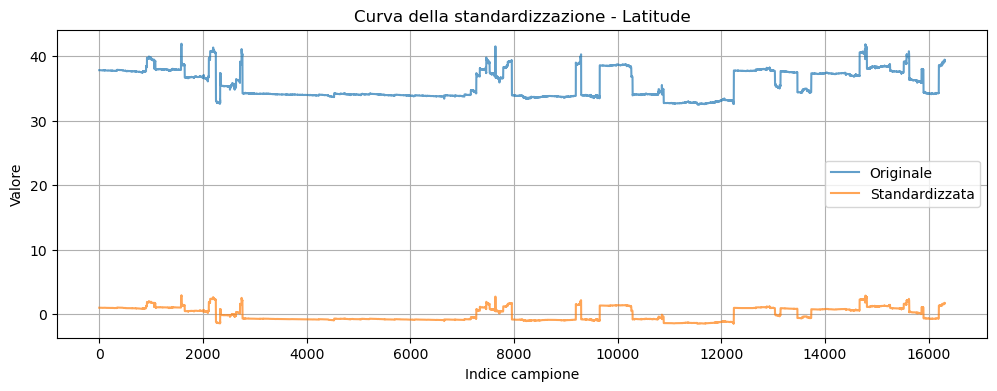

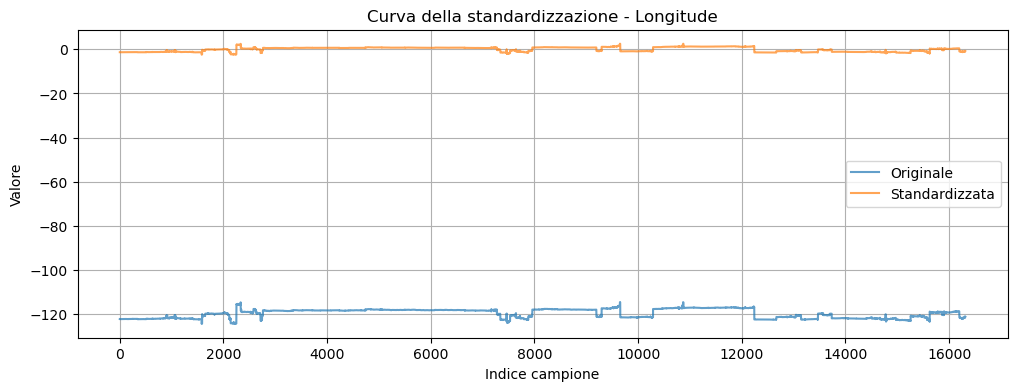

In [96]:
# Trasformiamo in DataFrame per mantenere i nomi delle colonne
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Ciclo per plottare ogni colonna
for col in X.columns:
    plt.figure(figsize=(12,4))

    # Curva valori originali
    plt.plot(X[col].values, label="Originale", alpha=0.7)

    # Curva valori standardizzati
    plt.plot(X_scaled_df[col].values, label="Standardizzata", alpha=0.7)

    plt.title(f"Curva della standardizzazione - {col}")
    plt.xlabel("Indice campione")
    plt.ylabel("Valore")
    plt.legend()
    plt.grid(True)
    plt.show()



In [97]:
#Train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_df, y, test_size=0.2, random_state=42
)

Mean Squared Error (MSE): 0.36051882586382367
R² score: 0.5875640968626525


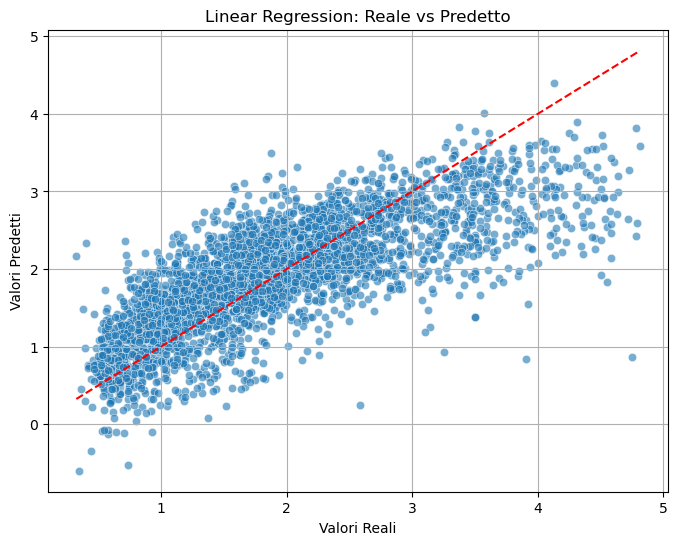

In [98]:
#Addestra il modello di regressione lineare
model = LinearRegression()
model.fit(X_train, y_train)

#Predizione sul test set
y_pred = model.predict(X_test)

# 7. Valutazione
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("R² score:", r2)

# 8. Visualizzazione valori reali vs predetti
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # linea y=x
plt.xlabel("Valori Reali")
plt.ylabel("Valori Predetti")
plt.title("Linear Regression: Reale vs Predetto")
plt.grid(True)
plt.show()